In [44]:
import pandas as pd
import numpy as np
import os
import glob
import cv2
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.decomposition import PCA
from sklearn.model_selection import train_test_split
import xgboost as xgb
from skimage.feature import hog
#from skimage.color import rgb2grey

from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report
from sklearn.preprocessing import StandardScaler
from sklearn.decomposition import PCA
from sklearn.svm import SVC
from tqdm import tqdm
from sklearn.metrics import roc_curve, auc
from sklearn.manifold import TSNE


In [33]:
image_list = [cv2.resize(cv2.imread("data_2021/data_2021/bdh/"+x, 0), (100, 33)) for x in sorted(os.listdir("data_2021/data_2021/bdh/"))]
#plt.imshow(image_list[666])

In [34]:
x = np.array(image_list)

In [35]:
y = np.array(pd.read_excel('data_2021/data_2021/code_bdh.xlsx', header=None))

[t-SNE] Computing 91 nearest neighbors...
[t-SNE] Indexed 7560 samples in 0.007s...
[t-SNE] Computed neighbors for 7560 samples in 0.368s...
[t-SNE] Computed conditional probabilities for sample 1000 / 7560
[t-SNE] Computed conditional probabilities for sample 2000 / 7560
[t-SNE] Computed conditional probabilities for sample 3000 / 7560
[t-SNE] Computed conditional probabilities for sample 4000 / 7560
[t-SNE] Computed conditional probabilities for sample 5000 / 7560
[t-SNE] Computed conditional probabilities for sample 6000 / 7560
[t-SNE] Computed conditional probabilities for sample 7000 / 7560
[t-SNE] Computed conditional probabilities for sample 7560 / 7560
[t-SNE] Mean sigma: 901.439273
[t-SNE] KL divergence after 250 iterations with early exaggeration: 96.273796
[t-SNE] KL divergence after 5000 iterations: 2.716842


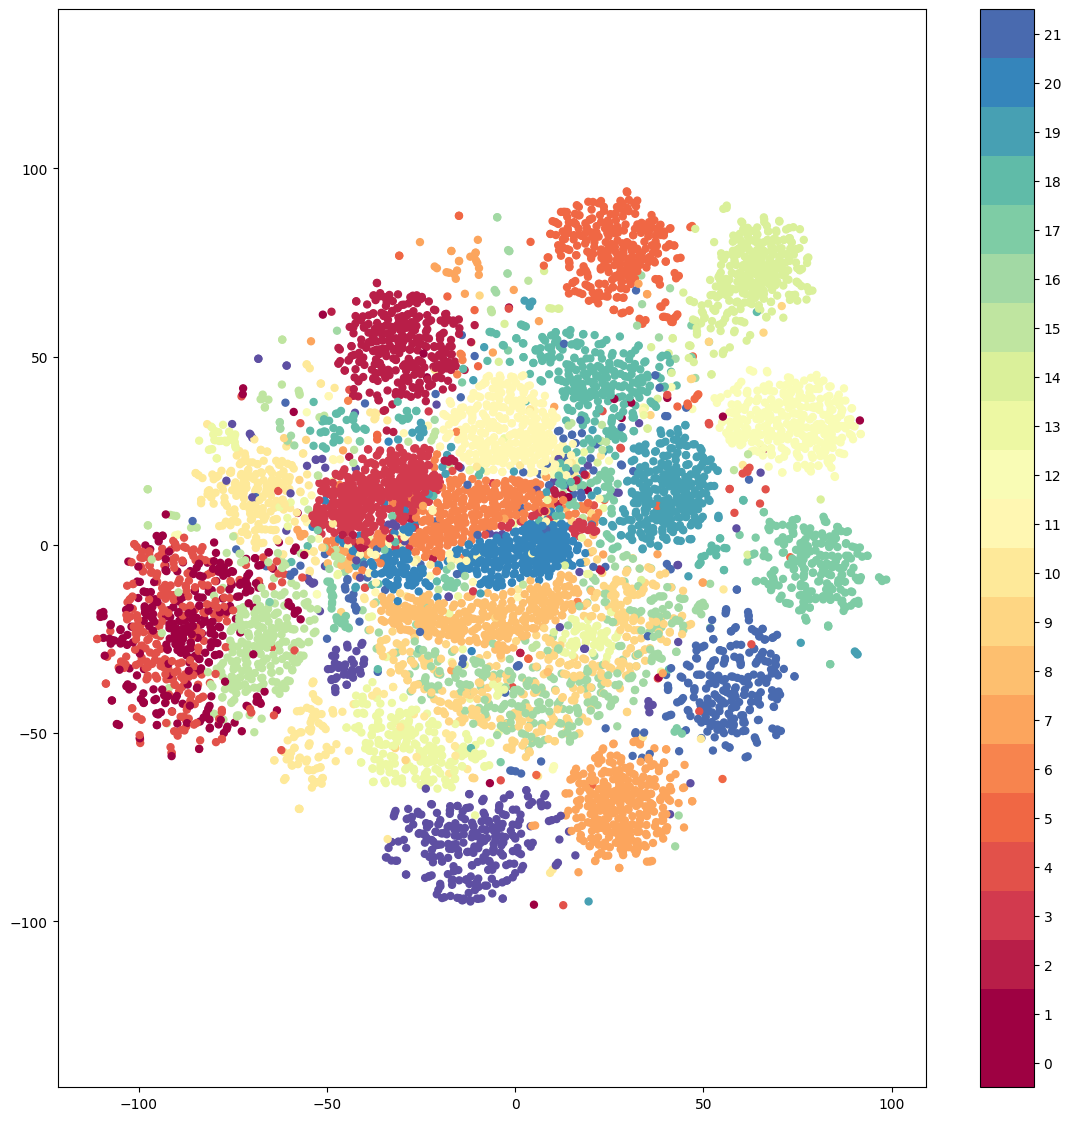

In [103]:
pca_250 = PCA(n_components=250)
pca_result_250 = pca_250.fit_transform(x)
tsne = TSNE(n_components=2,verbose=1, perplexity=30, n_iter=5000, learning_rate=200).fit_transform(pca_result_250)

plt.figure(figsize=(14, 14))
plt.scatter(tsne[:, 0], tsne[:, 1], s= 25, c=y[:], cmap='Spectral')
plt.gca().set_aspect('equal', 'datalim')
plt.colorbar(boundaries=np.arange(23)-0.5).set_ticks(np.arange(22))

In [37]:
def create_feature_matrix(imgs):
  features_list = []
  for img in tqdm(imgs):
    features_list.append(hog(img, block_norm='L2-Hys'))
  return np.array(features_list)

In [38]:
data = create_feature_matrix(x)

100%|██████████| 7560/7560 [00:04<00:00, 1597.12it/s]


In [39]:
print('Feature matrix shape is: ', data.shape)


Feature matrix shape is:  (7560, 1620)


In [61]:
print('Feature matrix shape is: ', data.shape)
ss = StandardScaler()
bees_stand = ss.fit_transform(data)
pca = PCA(n_components=500)
bees_pca = pca.fit_transform(bees_stand)
print('PCA matrix shape is: ', bees_pca.shape)

Feature matrix shape is:  (7560, 1620)
PCA matrix shape is:  (7560, 500)


In [100]:
X_train, X_test, y_train, y_test = train_test_split(bees_stand,
                                                    y,
                                                    test_size=.15,
                                                    random_state=42)
clf = xgb.XGBClassifier(
    n_estimators=500,
    max_depth=9,
    learning_rate=0.1,
    subsample=0.9,
    colsample_bytree=0.9,
    missing=-999,
    random_state=2019,
    tree_method='gpu_hist'  
)
clf.fit(X_train, y_train-1)

ypred = clf.predict(X_test)
confusion = confusion_matrix(y_test-1, ypred)
print('Confusion Matrix\n')
print(confusion)
print(classification_report(y_test-1, ypred, digits=4))

Confusion Matrix

[[50  0  0  2  0  0  0  0  0  0  0  1  2  0  1  0  0  0  0  0  0  0]
 [ 0 50  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0]
 [ 0  0 48  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0]
 [ 1  0  0 38  0  0  0  0  0  0  0  1  0  0  0  0  0  0  0  0  0  1]
 [ 0  1  0  1 50  0  0  0  0  0  0  0  0  0  0  0  1  0  0  0  0  1]
 [ 0  0  0  0  0 48  0  0  0  0  0  0  0  0  0  0  0  0  1  0  0  0]
 [ 0  0  0  0  0  0 59  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0]
 [ 0  0  1  0  0  0  0 48  0  0  0  0  0  0  0  0  0  0  0  0  0  0]
 [ 0  0  0  0  0  0  0  0 59  1  0  0  0  1  0  4  0  0  0  0  0  0]
 [ 0  0  0  0  0  0  0  0  0 42  0  0  1  0  0  0  0  0  0  0  0  0]
 [ 0  0  1  0  0  0  0  0  0  0 61  0  0  0  0  0  0  0  0  0  0  0]
 [ 1  0  0  0  0  0  0  0  0  0  0 47  0  0  0  0  0  0  0  0  0  0]
 [ 0  0  0  0  0  0  0  0  0  0  0  0 45  0  1  0  0  0  0  0  0  1]
 [ 0  0  0  0  0  0  0  0  0  0  0  0  0 45  0  0  0  1  0  0  0  0]
 [ 0  0  0  0  0

[t-SNE] Computing 121 nearest neighbors...
[t-SNE] Indexed 7560 samples in 0.011s...
[t-SNE] Computed neighbors for 7560 samples in 0.621s...
[t-SNE] Computed conditional probabilities for sample 1000 / 7560
[t-SNE] Computed conditional probabilities for sample 2000 / 7560
[t-SNE] Computed conditional probabilities for sample 3000 / 7560
[t-SNE] Computed conditional probabilities for sample 4000 / 7560
[t-SNE] Computed conditional probabilities for sample 5000 / 7560
[t-SNE] Computed conditional probabilities for sample 6000 / 7560
[t-SNE] Computed conditional probabilities for sample 7000 / 7560
[t-SNE] Computed conditional probabilities for sample 7560 / 7560
[t-SNE] Mean sigma: 10.355736
[t-SNE] KL divergence after 250 iterations with early exaggeration: 87.791870
[t-SNE] KL divergence after 5000 iterations: 2.153802


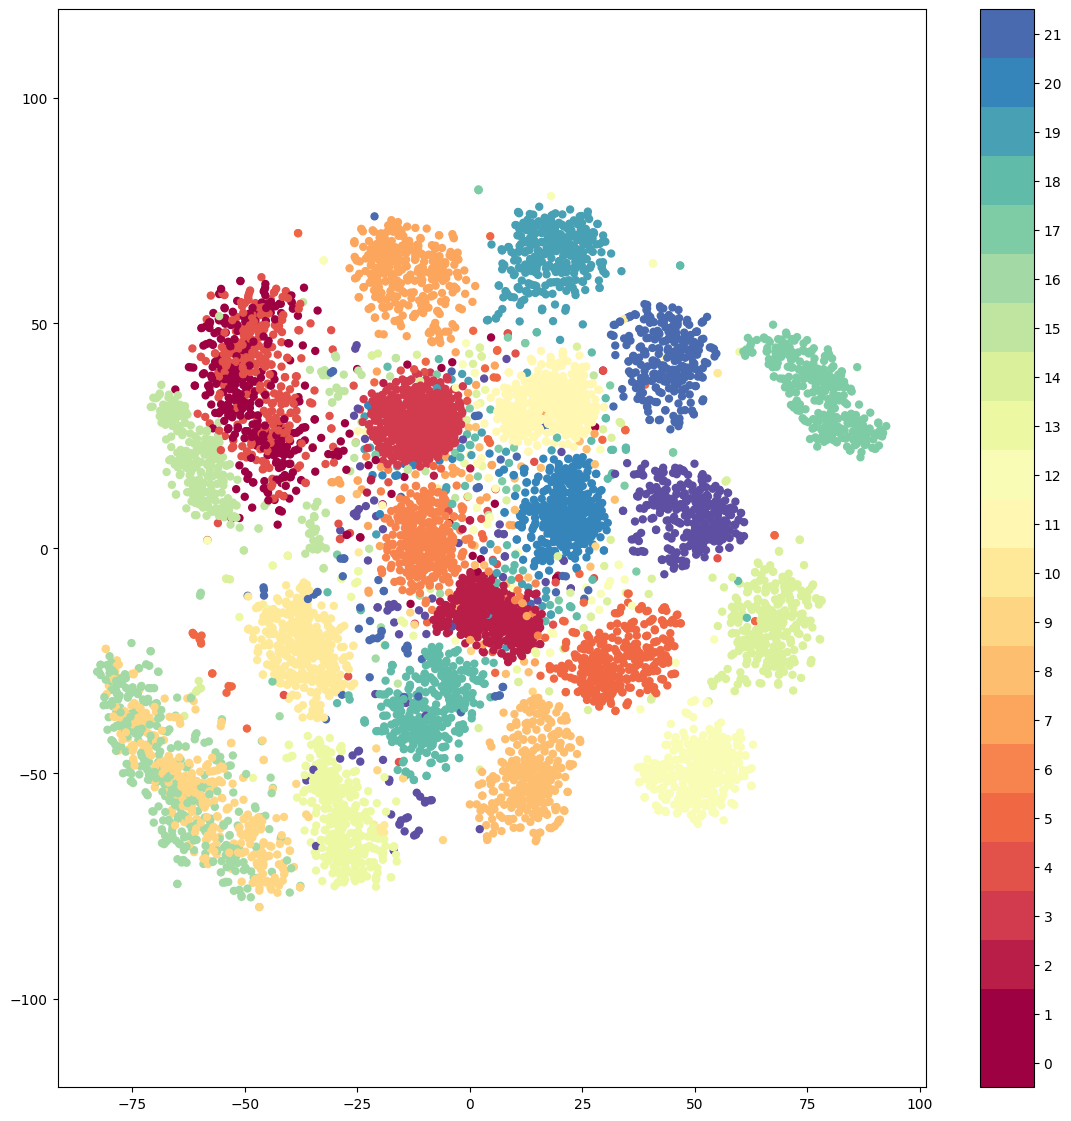

In [104]:
tsne = TSNE(random_state = 42, n_components=2,verbose=1, perplexity=40, n_iter=5000, learning_rate='auto').fit_transform(bees_pca)

plt.figure(figsize=(14, 14))
plt.scatter(tsne[:, 0], tsne[:, 1], s= 25, c=y[:], cmap='Spectral')
plt.gca().set_aspect('equal', 'datalim')
plt.colorbar(boundaries=np.arange(23)-0.5).set_ticks(np.arange(22))